# Ejercicio 2 Sentiment Analysis with politics
Ya se hizo la limpieza de datos inicial de este dataset en el notebook [Analisis Dataset 2](00_2_AnalisisDataset2.ipynb)

En este notebook haremos un Sentiment Analysis de los tweets de Obama y Trump.

In [2]:
import numpy as np
import pandas as pd
import os
import io
import matplotlib.pyplot as plt

# Permitir ver columnas completas
pd.set_option('display.max_colwidth', None)

In [3]:
# Función para cargar dataframe
def load_data(ruta, nombre):
    path = os.path.join(ruta, nombre)    
    return pd.read_csv(path, encoding="ISO-8859-1")

In [4]:
# Carga de datos
df = load_data('data', 'dataset_2_limpieza_inicial.csv')
df.head()

,president,tweet
0,OBAMA,low plastic stool cheap delicious noodles cold hanoi beer ill remember tony teach us food impoantly ability bring us together make us little less afraid unknown well miss
1,OBAMA,low plastic stool cheap delicious noodles cold hanoi beer ill remember tony teach us food impoantly ability bring us together make us little less afraid unknown well miss
2,OBAMA,national gun violence awareness day show commitment keep kid safe gun violence everyone weve lose take action change leadership laws reflect commitment matter long take
3,OBAMA,never truly debt owe fall heroes remember honor sacrifice live endure ideals justice equality oppounity generations americans give last full measure devotion
4,OBAMA,center leaders tomorrow ready step build world michelle grateful chicago city council make happen


# Visualización palabras más usadas
Visualizamos las palabras más usadas de cada presidente para hacernos una idea inicial.

In [5]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

class wordcloud():
    def wordclouddraw(self,df_pandas,sent):
        if sent == 'obama':
            text_filtered_sentiment = df_pandas['president'] == 'OBAMA'
            text_filtered_sentiment2 = df_pandas[text_filtered_sentiment]
            text = text_filtered_sentiment2.tweet.to_string(index=False, header=False)
            filename = "/Obama_tweets.png"
        elif sent == 'trump':
            text_filtered_sentiment = df_pandas['president'] == 'TRUMP'
            text_filtered_sentiment2 = df_pandas[text_filtered_sentiment]
            text = text_filtered_sentiment2.tweet.to_string(index=False, header=False)
            filename = "/Trump_tweets.png"
        else:
            # Mostrar ambos
            text = df_pandas.tweet.to_string( index=False, header=False)
            filename = "/Trump_Obama_tweets.png"

        file = os.getcwd()

        wordcloud = WordCloud(
            width = 1500,
            height = 1000,
            background_color = 'black',
            stopwords=['haze']
        ).generate(text)

        fig = plt.figure(
            figsize = (20, 10),
            facecolor = 'k',
            edgecolor = 'k')
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.tight_layout(pad=0)

        wcpath=file+filename

        wordcloud.to_file(wcpath)

In [6]:
from sklearn.feature_extraction.text import (
    CountVectorizer)

import collections
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

In [7]:
class wordfreq():
    def vectorization(self, df_pandas, sent2):
        countv = CountVectorizer()
        bow = countv.fit_transform(df_pandas.tweet)
        word_freq = dict(zip(countv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
        word_counter = collections.Counter(word_freq)
        word_counter_df = pd.DataFrame(word_counter.most_common(30), columns=['word', 'freq'])

        file = os.getcwd()
        title = "Word Frequency for %s tweets" % sent2
        fig, ax = plt.subplots(figsize=(10, 12))
        sns.barplot(x="freq", y="word", data=word_counter_df, palette="PuBuGn_d", ax=ax)

        plt.xticks(
            rotation=90,
            horizontalalignment='right',
            fontweight='light',
            size = 14
        )

        plt.xlabel("Frequency", size=14);
        plt.ylabel("30 more frequent words", size=14);

        plt.title(title, size=18)
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);

        filename = "/graph_%s_.png" %sent2
        graphpath = file + filename
        plt.savefig(graphpath, format="png")

## Obama

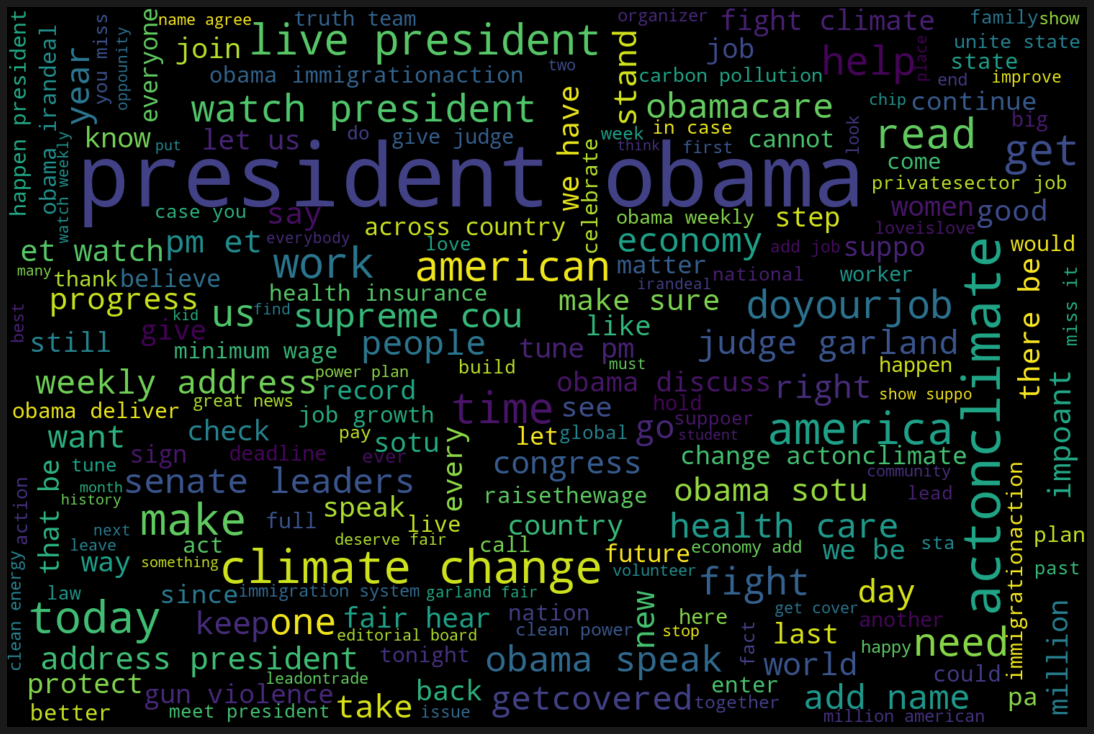

In [8]:
genwordcloud = wordcloud()
genwordcloud.wordclouddraw(df, sent="obama")

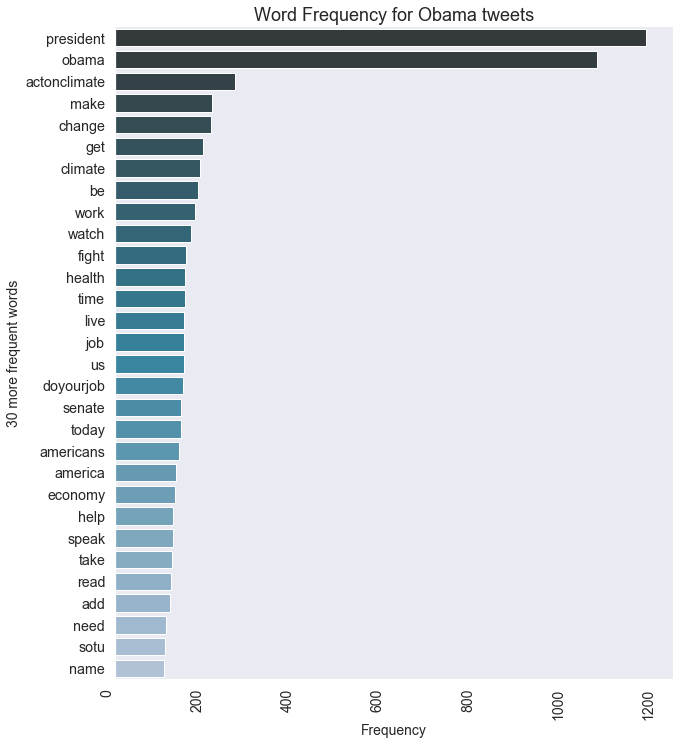

In [11]:
wf = wordfreq()
wf.vectorization(df[df['president'] == 'OBAMA'], sent2="Obama")

## Trump

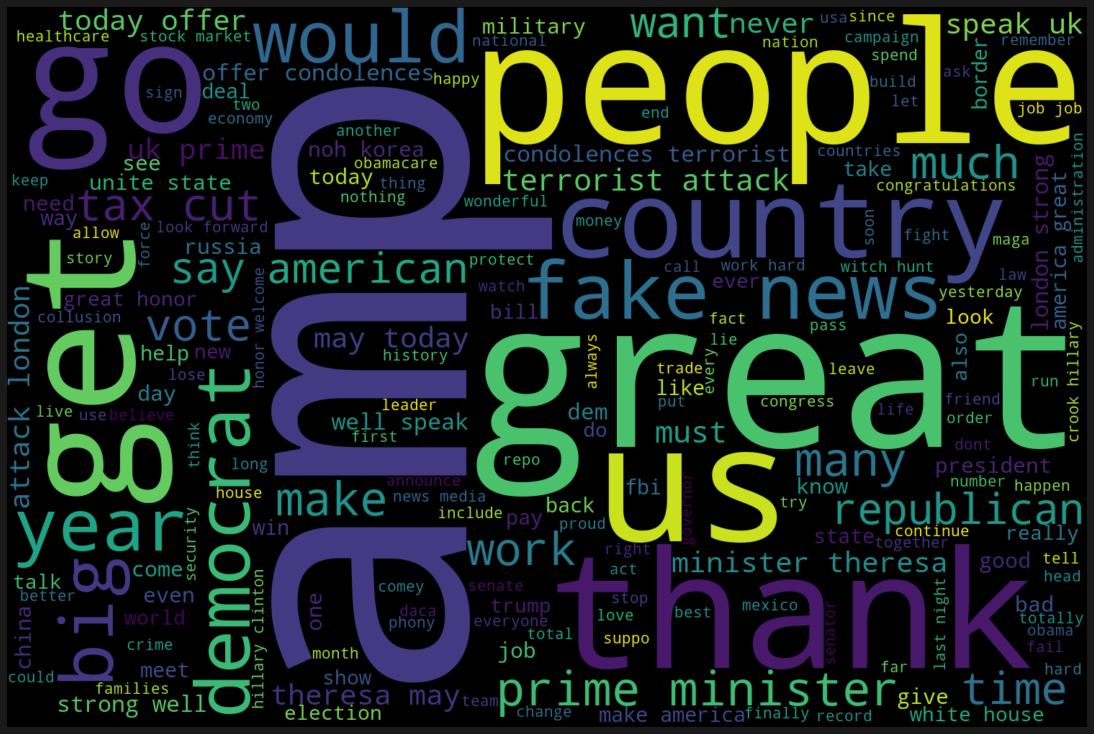

In [9]:
genwordcloud.wordclouddraw(df, sent="trump")

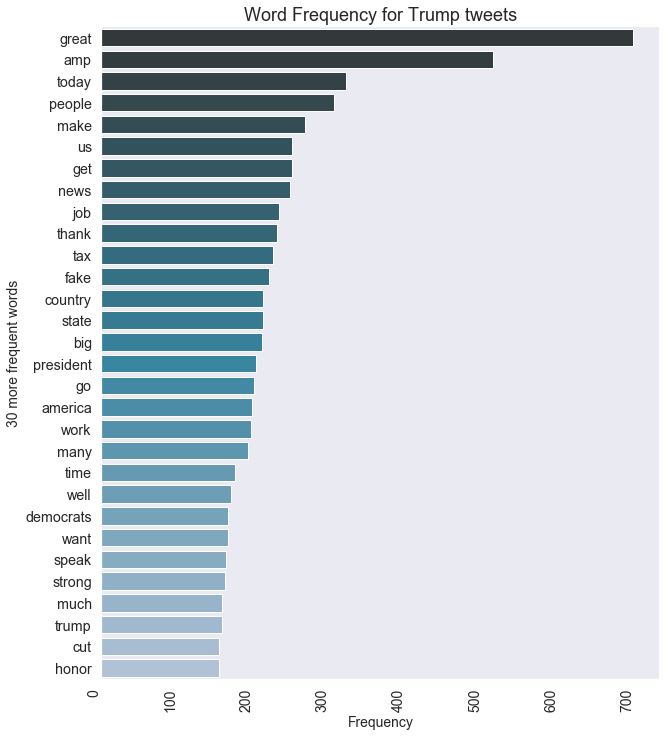

In [12]:
wf.vectorization(df[df['president'] == 'TRUMP'], sent2="Trump")

Como se puede ver tanto en los gráficos de frecuencia como en las nubes de etiquetas, Obama habla más de él y su familia en Twitter mientras que Trump habla del país, acontecimientos, trabajo etc. También parece que a Obama le interesa más el cambio climático.